In [7]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import DateOffset
pd.date_range('2021-11-01',periods=10, freq='D')
pd.date_range('2021-11-01',periods=10, freq='B')
pd.date_range('2021-11-01',periods=10, freq='M')
pd.date_range('2021-11-01',periods=10, freq='A')
pd.date_range('2021-11-01',periods=10, freq='H')

DatetimeIndex(['2021-11-01 00:00:00', '2021-11-01 01:00:00',
               '2021-11-01 02:00:00', '2021-11-01 03:00:00',
               '2021-11-01 04:00:00', '2021-11-01 05:00:00',
               '2021-11-01 06:00:00', '2021-11-01 07:00:00',
               '2021-11-01 08:00:00', '2021-11-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [7]:
pd.date_range('2021-11-01',periods=10, freq='QS')


DatetimeIndex(['2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01',
               '2023-01-01', '2023-04-01', '2023-07-01', '2023-10-01',
               '2024-01-01', '2024-04-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [8]:
pd.date_range('2021-11-01',periods=10, freq='BQS')

DatetimeIndex(['2022-01-03', '2022-04-01', '2022-07-01', '2022-10-03',
               '2023-01-02', '2023-04-03', '2023-07-03', '2023-10-02',
               '2024-01-01', '2024-04-01'],
              dtype='datetime64[ns]', freq='BQS-JAN')

In [9]:
pd.date_range('2021-11-01',periods=9, freq='2H30T')#2시간30분

DatetimeIndex(['2021-11-01 00:00:00', '2021-11-01 02:30:00',
               '2021-11-01 05:00:00', '2021-11-01 07:30:00',
               '2021-11-01 10:00:00', '2021-11-01 12:30:00',
               '2021-11-01 15:00:00', '2021-11-01 17:30:00',
               '2021-11-01 20:00:00'],
              dtype='datetime64[ns]', freq='150T')

In [10]:
pd.date_range('2021-11-01',periods=10, freq='100B')

DatetimeIndex(['2021-11-01', '2022-03-21', '2022-08-08', '2022-12-26',
               '2023-05-15', '2023-10-02', '2024-02-19', '2024-07-08',
               '2024-11-25', '2025-04-14'],
              dtype='datetime64[ns]', freq='100B')

In [30]:
from pandas.tseries.offsets import DateOffset
ts = pd.Timestamp('2021-10-31 23:28:30')
ts+ DateOffset(hours=40)

Timestamp('2021-11-02 15:28:30')

In [31]:
ts- DateOffset(years=71,months=4,days=5,hours=19,minutes=28,seconds=30)

Timestamp('1950-06-25 04:00:00')

In [3]:
from pandas_datareader import data
goog = data.DataReader('GOOG',start='2004',end='2021',data_source='yahoo')
goog=goog['Close']


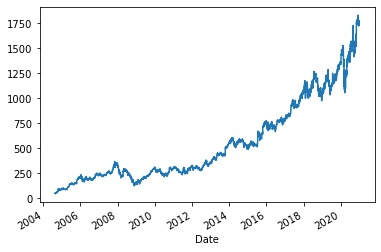

In [35]:
goog.plot();

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%config InlineBackend.figure_format = 'svg'

In [4]:
goog=goog.asfreq('D',method='pad')
print(goog)

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-21      53.952770
2004-08-22      53.952770
2004-08-23      54.495735
                 ...     
2020-12-27    1738.849976
2020-12-28    1776.089966
2020-12-29    1758.719971
2020-12-30    1739.520020
2020-12-31    1751.880005
Freq: D, Name: Close, Length: 5979, dtype: float64


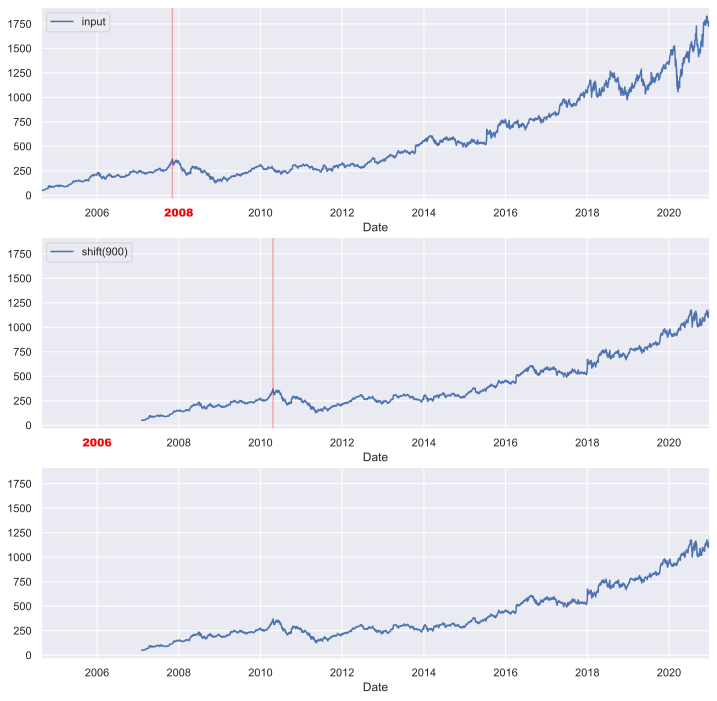

In [10]:
fig, ax =plt.subplots(3, sharey =True, figsize=(12,12))

goog = goog.asfreq('D',method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.shift(900).plot(ax=ax[2])

local_max = pd.to_datetime('2007-11-05')
offset=pd.Timedelta(900,'D')

ax[0].legend(['input'],loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy',color='red')
ax[0].axvline(local_max,alpha=0.3,color='red')
 
ax[1].legend(['shift(900)'],loc=2)
ax[1].get_xticklabels()[1].set(weight='heavy',color='red')
ax[1].axvline(local_max + offset, alpha = 0.3 ,color = 'red')



In [39]:
goog.resample('Q').median()

Date
2004-09-30      53.853144
2004-12-31      87.434772
2005-03-31      94.052467
2005-06-30     115.671432
2005-09-30     147.260529
                 ...     
2019-12-31    1298.994995
2020-03-31    1412.074951
2020-06-30    1375.739990
2020-09-30    1516.830017
2020-12-31    1741.289978
Freq: Q-DEC, Name: Close, Length: 66, dtype: float64

In [40]:
goog.resample('H').max()

Date
2004-08-19 00:00:00      49.982655
2004-08-19 01:00:00            NaN
2004-08-19 02:00:00            NaN
2004-08-19 03:00:00            NaN
2004-08-19 04:00:00            NaN
                          ...     
2020-12-30 20:00:00            NaN
2020-12-30 21:00:00            NaN
2020-12-30 22:00:00            NaN
2020-12-30 23:00:00            NaN
2020-12-31 00:00:00    1751.880005
Freq: H, Name: Close, Length: 143473, dtype: float64

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239197
2004-08-25      52.802086
                 ...     
2020-12-24    1738.849976
2020-12-28    1776.089966
2020-12-29    1758.719971
2020-12-30    1739.520020
2020-12-31    1751.880005
Name: Close, Length: 4122, dtype: float64